# Avaliações de Filmes do MovieLens

In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns

In [2]:
data_root = "Dados/ml-latest/"

## Formato dos dados

In [3]:
# Relação entre id do filme e seu título
movies = pd.read_csv(data_root + "movies.csv")

# Conv para string
movies['title'] = movies['title'].astype('string')

# Removendo espaços nas extremidades
movies['title'] = movies['title'].str.strip()

# Função para buscar padrão de ano
import re
f = lambda title : True if (re.findall(r"\([0-9]{4}\)$", title)) else False

# Separando filmes que têm ano no título
selec = movies["title"].map(f)
movies = movies[selec]

# Separando conteúdo em coluna título e ano
movies["year"] = movies["title"].map(lambda title : title[-5:-1]).astype(int)
movies["title"] = movies["title"].map(lambda title : title[:-6])

# Mudando index
movies = movies.set_index("movieId")

# Exibindo
movies

,title,genres,year
movieId,,,
1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji,Adventure|Children|Fantasy,1995
3,Grumpier Old Men,Comedy|Romance,1995
4,Waiting to Exhale,Comedy|Drama|Romance,1995
5,Father of the Bride Part II,Comedy,1995
...,...,...,...
288967,State of Siege: Temple Attack,Action|Drama,2021
288971,Ouija Japan,Action|Horror,2021
288975,The Men Who Made the Movies: Howard Hawks,Documentary,1973


In [4]:
# Lendo dados, renomeando colunas e exibindo primeiros itens
ratings = pd.read_csv(data_root + "ratings.csv")
ratings.columns = ["user", "movieId", "rating", "time"]
ratings

,user,movieId,rating,time
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [5]:
# Obtendo lista de todos os valores únicos de avaliação registrados
aval_unique = list(ratings['rating'].unique())
aval_unique.sort()

In [6]:
print("Os dados contém {} avaliações, cada qual com {} variáveis associadas.".format(ratings.shape[0], ratings.shape[1]))

print("\nEssas variáveis são: identificação do usuário, identificação do filme, avaliação do filme pelo usuário, e registro do momento em que foi avaliado.")

print("\nOs valores possíveis para se avaliar os filmes são:\n\n", ", ".join([str(value) for value in aval_unique]) + ".")

Os dados contém 33832162 avaliações, cada qual com 4 variáveis associadas.

Essas variáveis são: identificação do usuário, identificação do filme, avaliação do filme pelo usuário, e registro do momento em que foi avaliado.

Os valores possíveis para se avaliar os filmes são:

 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0.


### Estatísticas gerais

In [7]:
print("A média de todas as avaliações, independente do filme, foi {:.2f}".format(ratings[ 'rating'].mean()))
print("E a mediana dos mesmos dados, foi", ratings['rating'].median())

A média de todas as avaliações, independente do filme, foi 3.54
E a mediana dos mesmos dados, foi 4.0


# Visualização da Frequência de cada Avaliação

Pela visualização, podemos notar, que 4.0 foi a nota mais frequentemente dada pelos usuários, e que em segundo lugar, está a avaliação 3.0. Observamos que poucas avaliações abaixo de 2.0 foram dadas. 

Olhando a relação das frequências relativa, vemos também que apesar de 5.0 ser a nota máxima que um filme pode receber, ela foi a 3ª avaliação mais frequente, correspondendo à 13.1% de todas as avaliações.

Parece haver um preferência por notas inteiras. Vamos avaliar isso melhor a seguir.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequência')

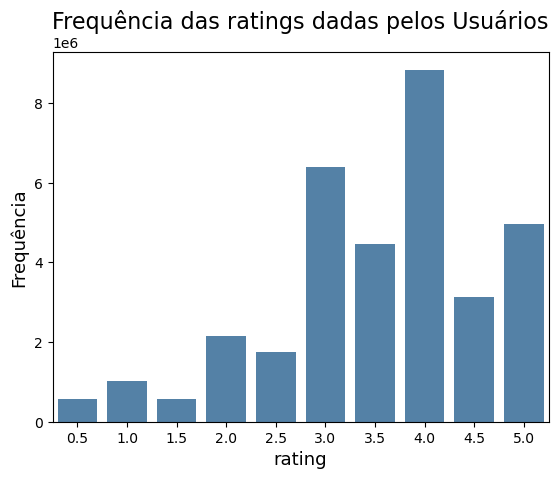

In [9]:
# Obtendo a frequência absoluta e plotando em um gráfico de barras
abs_freq = ratings['rating'].value_counts()

# Plotando
fig, ax = plt.subplots()
ax = sns.barplot(abs_freq, color = 'steelblue')

# Nomes no gráfico
ax.set_title("Frequência das ratings dadas pelos Usuários", fontsize = 16)
ax.set_xlabel('rating', fontsize = 13)
ax.set_ylabel('Frequência', fontsize = 13)

In [10]:
relat_freq = ratings['rating'].value_counts(normalize = True) * 100
pd.DataFrame(relat_freq)

,proportion
rating,
4.0,26.117027
3.0,18.918874
5.0,14.654405
3.5,13.197504
4.5,9.231024
2.0,6.344531
2.5,5.204317
1.0,2.996099
0.5,1.673869


In [11]:
print("A frequência de ratings menores que 2.0 é {:.2f} %".format(sum(relat_freq[rating] for rating in [0.5, 1.0, 1.5])))

A frequência de ratings menores que 2.0 é 6.33 %


## Inteiras vs. Fracionárias

Text(0.5, 1.0, 'ratings Fracionárias')

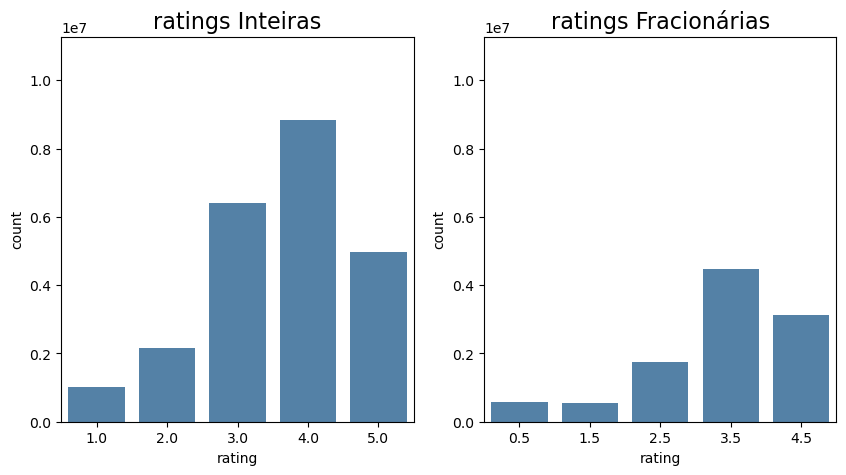

In [12]:
# Figura e eixos
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

max_value = ratings.shape[0] / 3

# Limites dos eixos
ax1.set_ylim(0, max_value)
ax2.set_ylim(0, max_value)

# Plot inteiros
sns.barplot(abs_freq, color = 'steelblue', order = [1.0, 2.0, 3.0, 4.0, 5.0], ax = ax1)

# Plot fracionários
sns.barplot(abs_freq, color = 'steelblue', order = [0.5, 1.5, 2.5, 3.5, 4.5], ax = ax2)

# Títulos
ax1.set_title("ratings Inteiras", fontsize = 16)
ax2.set_title("ratings Fracionárias", fontsize = 16)

Ao plotarmos lado a lado, na mesma escala, as frequências das ratings inteiras e fracionárias, vemos que as duas tem um comportamento muito semelhante. Porém, ao mesmo tempo, a frequência das ratings fracionárias parecem bem menores.

Vamos calcular a frequência de uma em relação a outra:

In [13]:
relat_frac_freq = sum(relat_freq[rating] for rating in [0.5, 1.5, 2.5, 3.5, 4.5])
relat_int_freq  = 100 - relat_frac_freq

print(f"A ratings fracionárias são {relat_frac_freq:.1f} % de todas as ratings, de forma que as ratings inteiras são {relat_int_freq / relat_frac_freq:.1f} vezes mais frequentes que as fracionárias.")

A ratings fracionárias são 31.0 % de todas as ratings, de forma que as ratings inteiras são 2.2 vezes mais frequentes que as fracionárias.


# Avaliações por filme

## Múltiplas avaliações recebidas por um filme

In [14]:
# Vizualização todas as avalizações dadas ao filme 1
ratings.query("movieId==1").head(7)

,user,movieId,rating,time
0,1,1,4.0,1225734739
62,2,1,5.0,835815971
304,7,1,4.0,974518024
653,10,1,3.0,1430666394
852,12,1,5.0,862500738
952,14,1,2.5,1311533061
1242,21,1,3.0,1172695347


# Média de cada filme

Calculamos aqui, a média das ratings de cada filme dos dados.

In [15]:
# Agrupando os dados por filmes (todas as avaliações de cada filme em um grupo)
movie_grouped_ratings = ratings.groupby("movieId")

In [16]:
# Calculando a média de todos os filmes
movies_means = movie_grouped_ratings.mean()['rating']
pd.DataFrame(movies_means).head()

,rating
movieId,
1,3.893508
2,3.278179
3,3.171271
4,2.868395
5,3.076957


### Estatísticas dos dados

In [17]:
pd.DataFrame(movies_means.describe()).round(2)

,rating
count,83239.00
mean,3.01
std,0.79
min,0.50
25%,2.57
50%,3.08
75%,3.50
max,5.00


# Plotando os dados de média por filme

## Boxplot

Text(0.5, 0, 'Média dos filmes')

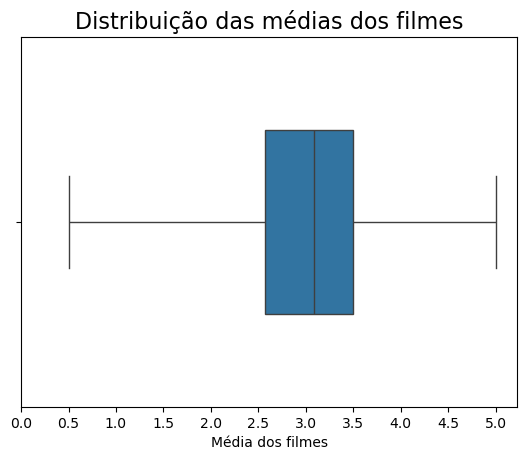

In [18]:
ax = sns.boxplot(x = movies_means, width = 0.5, whis=(0,100))
ticks = [i*0.5 for i in range(11)]
ax.set_xticks(ticks)
ax.set_title("Distribuição das médias dos filmes", fontsize = 16)
ax.set_xlabel("Média dos filmes")

### Conclusão boxplot

Pela visualização de boxplot gerada sobre as médias de avaliações de filmes, podemos ver pela pequena distância entre o primeiro e terceiro quartil, que as ratings estão muito concentradas entre aproximadamente [XXX] 2.6 e [XXX] 3.5, enquanto os outros intervalos estão espalhados em intervalos maiores.

Porém de toda forma, a distribuição ainda está um tanto deslocadas para a direita, o que indica uma assimetria à esquerda, de forma que os dados têm mais volume nos valores mais altos, e uma calma mais esticada à esquerda.

## Histograma

Observamos que poucos filmes têm avaliações médias acima de 4.25, apesar de muitas avaliações 5.0 serem individualmente dadas. Vamos calcular quantos são:

Text(0, 0.5, 'Contagem de avaliações')

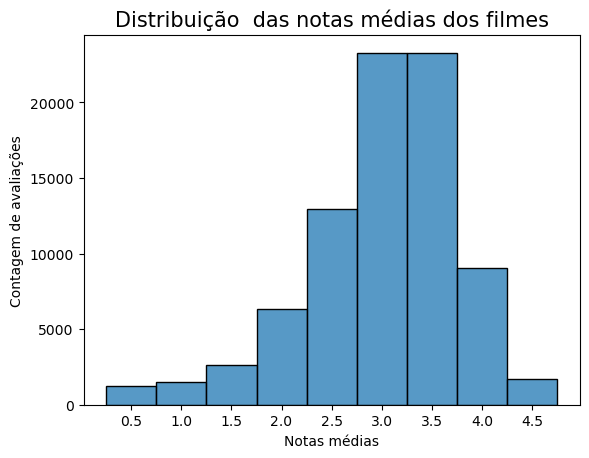

In [19]:
ax = sns.histplot(movies_means, bins = [0.25 + i*0.5 for i in range(10)])
ticks = [0.5 + i*0.5 for i in range(9)]
ax.set_xticks(ticks)
ax.set_title("Distribuição  das notas médias dos filmes", fontdict={"fontsize" : 15})
ax.set_xlabel("Notas médias")
ax.set_ylabel("Contagem de avaliações")

In [20]:
high_ratings_freq = (movies_means[movies_means > 4.0].shape[0] / movies_means.shape[0]) * 100

print("A frequência de filmes com avaliação média maior que 4.25, é {:.2f} %".format(high_ratings_freq))

A frequência de filmes com avaliação média maior que 4.25, é 4.71 %


Vamos investigar isso mais a fundo:

## Filmes com maior frequencia relativa de avaliações altas

Se chamarmos de avaliações altas as avaliações de 5.0 e avaliarmos a taxa de avaliações altas sobre o total, podemos ver que são raros os casos de filmes minimamente conhecidos que tem a grande maioria das avalições altas. Ou seja, mesmo que um filme receba muitas avaliações altas, esse valor tende a se equilibrar com avaliações menores.

In [21]:
# Montando o dataframe
df = pd.DataFrame()
df.index = movies_means.index
df['mean_rating'] = movies_means.round(2)

df["vote_counts"] = ratings.groupby("movieId")["movieId"].value_counts()
high_ratings = ratings.query("rating >= 4.5").groupby("movieId")["movieId"].value_counts()

df["high_ratings_rate"] = (high_ratings / df["vote_counts"]).fillna(0)

Text(0.5, 0, 'Quantidade de votos')

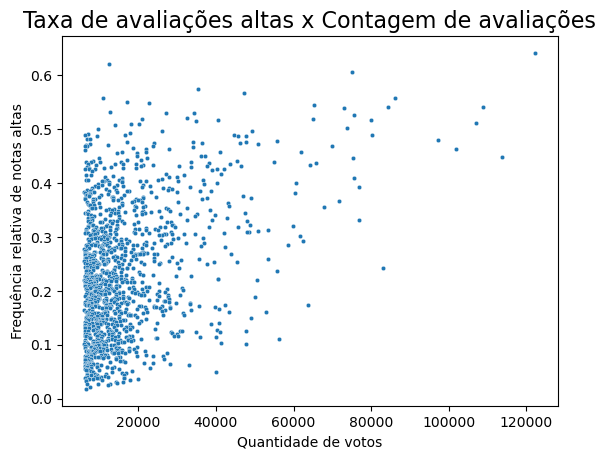

In [22]:
# Inserindo no DataFrame
min_vote_count = df["vote_counts"].max() * 0.05
df_pop = df.query(f"vote_counts >= {min_vote_count}").sort_values("high_ratings_rate", ascending=False).copy()

# Vizualização
ax = sns.scatterplot(data=df_pop, x="vote_counts", y="high_ratings_rate", s=10)
ax.set_title("Taxa de avaliações altas x Contagem de avaliações", fontsize=16)

ax.set_ylabel("Frequência relativa de notas altas")
ax.set_xlabel("Quantidade de votos")

## Scatterplot (Nota x Quantidade de avaliações)

Text(0, 0.5, 'Quantidade de Votos')

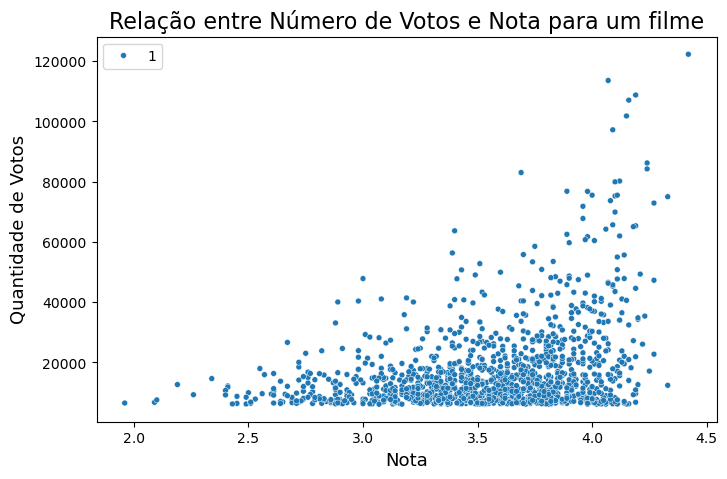

In [23]:
# Gráfico
fig, ax = plt.subplots(figsize = (8,5))
sns.scatterplot(data = df.query(f"vote_counts >= {min_vote_count}"), x = 'mean_rating', y = 'vote_counts', size = 1, ax = ax)

# Nomes no gráfico
ax.set_title("Relação entre Número de Votos e Nota para um filme", fontsize = 16)
ax.set_xlabel("Nota", fontsize = 13)
ax.set_ylabel("Quantidade de Votos", fontsize = 13)

### Filmes que têm grande quantidade de votos, tendem a ter notas mais altas

Observamos, que quanto maior a quantidade de votos um filme tem, é mais comum que o filme seja bem avaliado. Isso provavelmente vem do fato, que filmes de alta qualidade, tendem a se tornar mais populares, de forma que mais pessoas os assistam e os avaliem. Em outras palavras, é improvável que um filme que é amplamente considerado "ruim", atraia  um grande público.

## Filmes perto do vértice - Os filmes mais aclamados

Vamos procurar os filmes próximos do vértice desse "triângulo", ao calcular a distância do ponto à origem. Os filmes onde essa distância é maior, tendem a ser os filmes no vértice. Esses filmes supostamente seriam filmes amplamente considerados bons, e possivelmente "clássicos", já que foram avaliados por muitas pessoas, e mantêm uma nota muito alta.

### Os melhores filmes?

De fato, podemos observar facilmente vários casos de filmes que receberam grande aclamação e que são bem conhecidos.

In [24]:
# Adicionando nome e ano 
df_pop_title = pd.concat([df,  movies], axis = 1).query(f"vote_counts > {min_vote_count}")

# Coluna de produto (num de votos * rating média)
df_pop_title_norm = df_pop_title.copy()
df_pop_title_norm["adj"] = 100 * df_pop_title_norm['vote_counts'] / df_pop_title_norm['vote_counts'].max()
df_pop_title_norm["opos"] = 100 * df_pop_title_norm['mean_rating'] / df_pop_title_norm['mean_rating'].max()

df_pop_title_norm['norm'] = ((df_pop_title_norm["adj"]**2 + df_pop_title_norm["opos"]**2)**(1/2)).round(1)

# Exibir ordenando pelo produto
df_pop_title_norm.sort_values('norm', ascending = False)[["title", "mean_rating", "norm"]].head(10)

,title,mean_rating,norm
movieId,,,
318,"Shawshank Redemption, The",4.42,141.4
356,Forrest Gump,4.07,130.8
296,Pulp Fiction,4.19,130.0
2571,"Matrix, The",4.16,128.5
593,"Silence of the Lambs, The",4.15,125.5
260,Star Wars: Episode IV - A New Hope,4.09,122.0
2959,Fight Club,4.24,119.0
527,Schindler's List,4.24,118.1
858,"Godfather, The",4.33,115.6


## Limite de nota com mais de X votos

In [25]:
df_pop_title.query(f"vote_counts > {min_vote_count}").sort_values("mean_rating", ascending=False).head(10)[["title", "mean_rating", "vote_counts"]]

,title,mean_rating,vote_counts
movieId,,,
318,"Shawshank Redemption, The",4.42,122296.0
202439,Parasite,4.33,12399.0
858,"Godfather, The",4.33,75004.0
50,"Usual Suspects, The",4.27,72893.0
1203,12 Angry Men,4.27,22730.0
1221,"Godfather: Part II, The",4.27,47271.0
2019,Seven Samurai (Shichinin no samurai),4.25,17120.0
2959,Fight Club,4.24,86207.0
527,Schindler's List,4.24,84232.0


In [26]:
print("Podemos observar que de fato, como indica o comportamento em forma de 'triângulo' acima, nenhum filme")
print("suficientemente conhecido e votado, chega a notas muito altas.")
print(f"Por exemplo, nenhum filme com mais de {int(min_vote_count)} votos conseguiu ultrapassar a nota de {round(df_pop_title['mean_rating'].max(), 2)}")

Podemos observar que de fato, como indica o comportamento em forma de 'triângulo' acima, nenhum filme
suficientemente conhecido e votado, chega a notas muito altas.
Por exemplo, nenhum filme com mais de 6114 votos conseguiu ultrapassar a nota de 4.42


Isso provelmente vem do fato, de que um filme não muito popular, pode atingir um nicho de pessoas particularmente interessadas naquele tipo de filme, e a maioria delas avaliar muito bem o filme, mas ao atingir um público razoável, é muito difícil que o filme vá agradar a todos, impedindo assim, que um filme popular, atinja notas muito altas.

## Dispersão de ratings por Filmes

In [27]:
pop_movies = df.query(f"vote_counts >= {min_vote_count}").index
selec = df.index.isin(pop_movies)

# Desvio padrão das avaliações
deviation = ratings.groupby("movieId")["rating"].std()[selec].round(3)
deviation.name = "rating_std"

# Juntando dados
df_pop_title_std = pd.concat([df_pop_title, deviation], axis=1)[["title", "mean_rating", "rating_std"]]

### Qual a melhor sugestão de filme a se fazer?

Aqui estão os filmes com nota maior que 4.0, ordenadas pelas menores variações nas votações.

In [28]:
df_pop_title_std_copy = df_pop_title_std.copy()
df_pop_title_std_copy["mean_rating"] = df_pop_title_std_copy["mean_rating"].round(1)
df_pop_title_std_copy["rating_std"] = df_pop_title_std_copy["rating_std"].round(2)

pd.set_option('display.max_rows', None)

df_pop_title_std_copy.sort_values(["mean_rating", "rating_std"], ascending=[False, True]).head(10)

,title,mean_rating,rating_std
movieId,,,
318,"Shawshank Redemption, The",4.4,0.77
202439,Parasite,4.3,0.77
1203,12 Angry Men,4.3,0.78
50,"Usual Suspects, The",4.3,0.80
858,"Godfather, The",4.3,0.87
1221,"Godfather: Part II, The",4.3,0.88
908,North by Northwest,4.2,0.78
904,Rear Window,4.2,0.79
44555,"Lives of Others, The (Das leben der Anderen)",4.2,0.79


### Mesma nota, diferentes recepções por parte do público

Abaixo podemos observar dois filmes com notas muito próximas, mas que tiveram recepções um tanto diferentes. Em Senhor dos Anéis a porcentagem de pessoas que acharam o filme ótimo, foi maior que a porcentagem de pessoas que acharam apenas bom, enquanto em "Pacto Sinistro", o inverso acontece. De alguma forma essas duas variações se compensam e resultam numa nota média igual, porém os dados completos representam um recepção muito diferente. Visto isso, é muito mais seguro indicar o primeiro do que o segundo filme.

Text(0.5, 0, 'Faixa de avaliação')

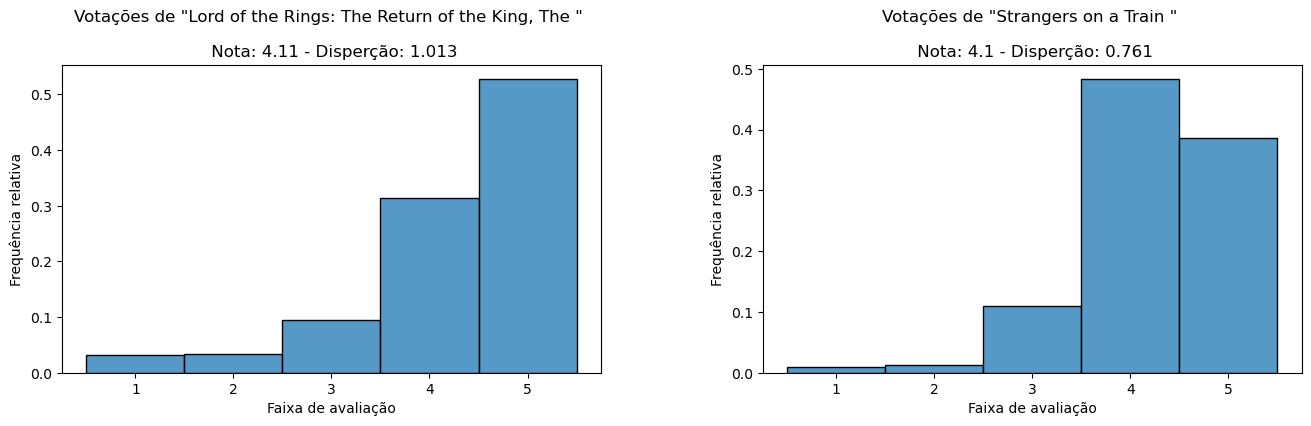

In [29]:
f0 = 7153
f1 = 2186

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams['figure.dpi'] = 100  

figure, axs = plt.subplots(1, 2) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

movie_ratings0 = ratings[ratings["movieId"] == f0]["rating"]
movie_ratings1 = ratings[ratings["movieId"] == f1]["rating"]

bins1 = [0.25+i*0.5 for i in range(11)]
bins2 = [0.5+i*1.0 for i in range(6)]

sns.histplot(data=movie_ratings0, bins=bins2, ax=axs[0], stat="proportion")
axs[0].set_title(f'Votações de "{df_pop_title_std.loc[f0]["title"]}" \n\n Nota: {df_pop_title_std.loc[f0]["mean_rating"]} - Disperção: {df_pop_title_std.loc[f0]["rating_std"]}')

sns.histplot(data=movie_ratings1, bins=bins2, ax=axs[1], stat="proportion")
axs[1].set_title(f'Votações de "{df_pop_title_std.loc[f1]["title"]}" \n\n Nota: {df_pop_title_std.loc[f1]["mean_rating"]} - Disperção: {df_pop_title_std.loc[f1]["rating_std"]}')

axs[0].set_ylabel("Frequência relativa")
axs[1].set_ylabel("Frequência relativa")
axs[0].set_xlabel("Faixa de avaliação")
axs[1].set_xlabel("Faixa de avaliação")

## Filmes que dividem opinião

Alguns filmes não levam o público a um concenso geral. Como é o exemplo de "Crepúsculo", de nota 2.4, e "O Vento Levou" de nota 3.8. Neste último caso, apesar de haver uma tendência maior que de Crespúsculo, podemos observar que uma grande porção considerou o filme ótimo, mas um grande porção também considerou o filme "Ok".

Text(0.5, 0, 'Faixa de avaliação')

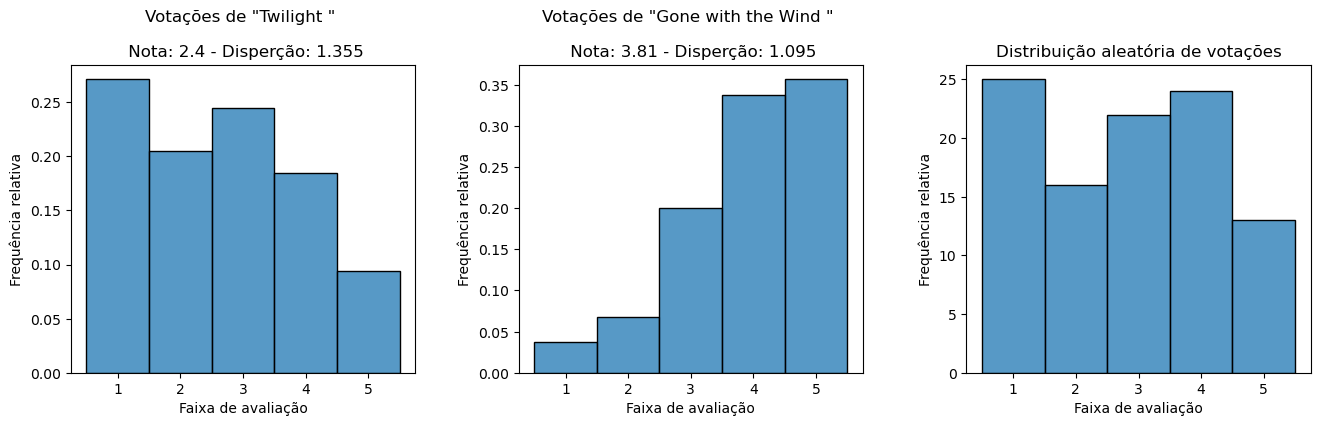

In [30]:
f0 = 63992 # Twilight
f1 = 920 # West Side Story

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams['figure.dpi'] = 100  

figure, axs = plt.subplots(1, 3) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

movie_ratings0 = ratings[ratings["movieId"] == f0]["rating"]
movie_ratings1 = ratings[ratings["movieId"] == f1]["rating"]

bins1 = [0.25+i*0.5 for i in range(11)]
bins2 = [0.5+i*1.0 for i in range(6)]

sns.histplot(data=movie_ratings0, bins=bins2, ax=axs[0], stat="proportion")
axs[0].set_title(f'Votações de "{df_pop_title_std.loc[f0]["title"]}" \n\n Nota: {df_pop_title_std.loc[f0]["mean_rating"]} - Disperção: {df_pop_title_std.loc[f0]["rating_std"]}')

sns.histplot(data=movie_ratings1, bins=bins2, ax=axs[1], stat="proportion")
axs[1].set_title(f'Votações de "{df_pop_title_std.loc[f1]["title"]}" \n\n Nota: {df_pop_title_std.loc[f1]["mean_rating"]} - Disperção: {df_pop_title_std.loc[f1]["rating_std"]}')

plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams['figure.dpi'] = 100  

import random
random.seed(16)
values = []
population = [0.5 + i*0.5 for i in range(10)]
for i in range(100):

    values.append(random.choice(population))

sns.histplot(data=pd.Series(values), bins=bins2, ax=axs[2], stat="count")
axs[2].set_title("Distribuição aleatória de votações")

axs[0].set_ylabel("Frequência relativa")
axs[1].set_ylabel("Frequência relativa")
axs[2].set_ylabel("Frequência relativa")
axs[0].set_xlabel("Faixa de avaliação")
axs[1].set_xlabel("Faixa de avaliação")
axs[2].set_xlabel("Faixa de avaliação")

As notas do público sobre Crepúsculo são tão dispersas, que chegam a lembrar uma distribuição aleatória.

# Relações com ano

Existe uma relação clara entre rating média e ano?

In [31]:
pd.set_option('display.max_rows', 30)

# Convertendo tipo da coluna ano
df_title = pd.concat([df, movies], axis=1).dropna()
df_title["year"] = df_title["year"].astype(int)
df_pop_title["year"] = df_pop_title["year"].astype(int)

#### Avaliação de filmes ao longo do tempo

Text(0, 0.5, 'Avaliação média dos filmes')

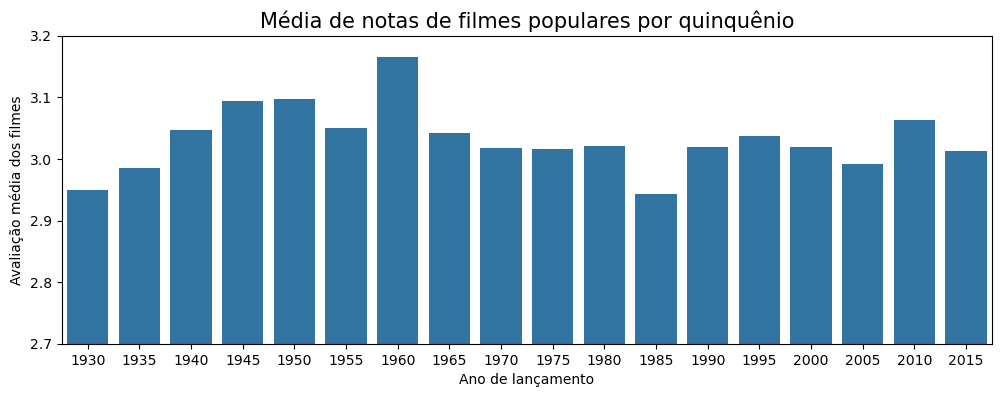

In [32]:
fig, ax = plt.subplots(figsize = (12,4))

decades = {}
bins = [1930 + 5*i for i in range(19)]
for i in range(18):

    decades[bins[i]] = df_title.query(f'year >= {bins[i]} & year < {bins[i+1]}')["mean_rating"].mean()

sns.barplot(decades)
ax.set_ylim(2.7,3.2)
ax.set_title("Média de notas de filmes populares por quinquênio", fontdict={"fontsize" : 15})

plt.xlabel("Ano de lançamento")
plt.ylabel("Avaliação média dos filmes")

#### Filmes bem avaliados vs. filmes mal avaliados, por quinquênio

Podemos observar no gráfico abaixo, onde o valor sobre as barras representa a razão de filmes bem valaidos no total daquele quinquênio, que a quantidade relativa de filmes bem avaliados não varia muito ao longo do tempo.

Text(0, 0.5, 'Quantidade de filmes')

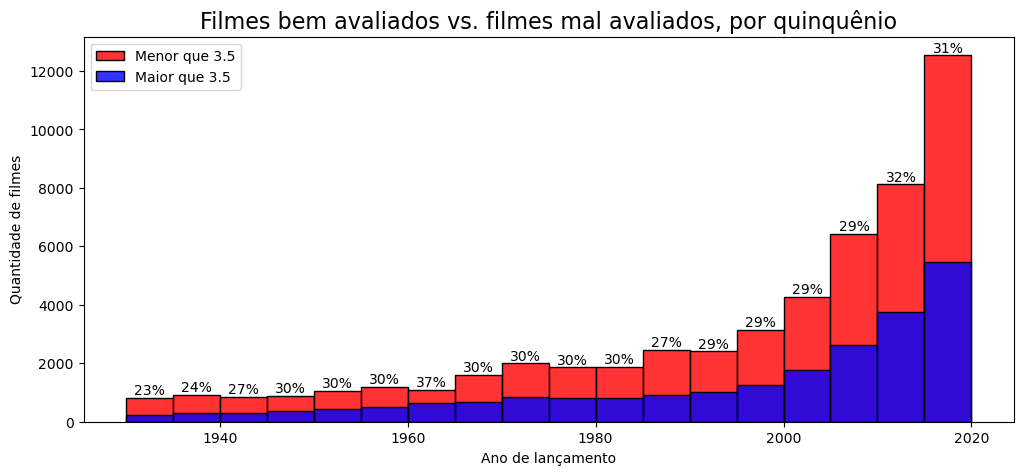

In [33]:
fig, ax = plt.subplots(figsize = (12,5))

bins = [1930 + 5*i for i in range(19)]

sns.histplot(data = df_title.query('mean_rating < 3.5'), x = 'year', 
             bins = bins, color = 'red', alpha = 0.8, label = 'Menor que 3.5')

sns.histplot(data = df_title.query('mean_rating >= 3.5'), x = 'year', 
             bins = bins, color = 'blue', alpha = 0.8, label = 'Maior que 3.5')

# Listando a frequência relativa de filmes bem avaliados
taxas = []
for i in range(18):

    temp = df_title.query(f'year >= {bins[i]} & year < {bins[i+1]}')
    taxas.append("{:.0f}%".format(100 * temp.query('mean_rating >= 3.5').shape[0] / temp.shape[0], 2))

# Incluindo no plot
rects = ax.patches

for rect, taxa in zip(rects, taxas):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, taxa, ha="center", va="bottom"
    )

# Título
ax.set_title("Filmes bem avaliados vs. filmes mal avaliados, por quinquênio", fontdict={"fontsize" : 16})
plt.legend()

plt.xlabel("Ano de lançamento")
plt.ylabel("Quantidade de filmes")

## Conclusão

Através desta análise exploratória, pudemos conhecer melhor o conjunto de dados trabalhados, ao:
* reconhecer os dados registrados para cada avaliação dada,
* reconhecer os dados associados a cada filme, 
* concluir a aparente preferência por notas inteiras do usuário,
* anaisar a distribuição de notas médias dos filmes,
* constatar a relação de popularidade do filme e o teto de nota que ele chega a receber, bem como o teto de popularidade de um filme mal avaliado;
* criar uma métrica da aclamação de um filme, e listar os "melhores filmes" segundo ela;

Avaliamos também quais filmes seriam sugestões mais seguras, por apresentarem menores dispersões de votos, e na direção oposta, analisamos quais são os filmes mais "polêmicos", e dividem mais opnião sobre a avaliação. Para terminar, avaliamos a qualidade da produção de filmes ao decorrer do anos, e chegamos a conclusão, que apesar os dados, apesar de contrariar muitas opiniões, mostra que a qualidade da produção cinematográfica é quase contante ao longo das décadas.